# k-Nearest Neighbors Algorithm(kNN)

### What is it?
kNN is a nonparametric predictive model for classification or regression. The input consists of training data and the output is either class membership in the case of classsification or average of the k nearest neighbors in the case of regression.


### When to use it?
Use of knn is appropriate when the following conditions are met.
1. The data is in a feature space or metric space. This ensures that distance can be defined. This distance may not be Euclidean although this is commonly used.
2. Training data consists of a set of vectors with the output - classification or numerical output.
3. A natural number, k, must be given (usually an odd number) which indicates how many nearest neighbors (neighbor decided based on distance metric) will influence the output or classification. When k = 1 the algorithm is just called nearest neighbor algorithm.


### Limitations?
1. Will perform differently for different values of k.
2. Unclear if all attributes should be used or only some and how to define distance. 
3. High computation cost since distance needs to be calculated for all data points with each query.
4. Algorithm does not learn but rather uses the training data for every prediction. This can be particularly problematic for noisy data.


#### For definition of statistics terms visit: http://www.nedarc.org/statisticalHelp/statisticalTermsDictionary.html
#### For definitions of machine learning terms visit: https://developers.google.com/machine-learning/glossary/

In [17]:
#Bring in dependencies
# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn import metrics
from sklearn import datasets

In [19]:
#Load dataset
cancer = datasets.load_breast_cancer()


#The 13 features used as independent variables
cancer_X = cancer.data

#The response or dependent variable is a quantitative measure of disease progression one year after baselin
cancer_y = cancer.target


#We will look at 13 data measurements of breast cancer patients as well as if their tumor was benign or malignant
# print the names of the 13 features
print("Features: ", cancer.feature_names)

# print the label type of cancer('malignant' 'benign')
print("Target Outcomes: ", cancer.target_names)

Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Target Outcomes:  ['malignant' 'benign']


In [20]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(cancer_X, cancer_y, random_state=42) 

In [21]:
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train)  
y_pred = classifier.predict(X_test) 

In [22]:
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

[[50  4]
 [ 1 88]]
             precision    recall  f1-score   support

          0       0.98      0.93      0.95        54
          1       0.96      0.99      0.97        89

avg / total       0.97      0.97      0.96       143



In [24]:
scores = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    scores.append(metrics.accuracy_score(y_test, y_pred))

Text(0,0.5,'Mean Error')

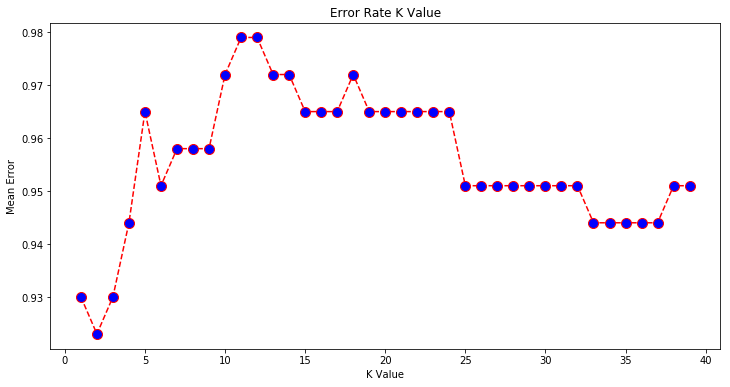

In [25]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), scores, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error') 

In [3]:
#Import the data
temp = pd.read_csv('../DataSets/temp.csv')
temp.head()

,Unnamed: 0,title,budget,revenue,release_date,runtime,original_language,production_companies,production_countries,genres,spoken_languages,id,imdb_id,vote_average,vote_count
0,20498,Snitch,35000000,42930462,2/21/2013,112,en,"[{'name': 'Front Street Productions', 'id': 14...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...","[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",134411,tt0882977,5.8,1155
1,17750,Contagion,60000000,137551594,9/8/2011,106,en,"[{'name': 'Double Feature Films', 'id': 215}, ...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...","[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",39538,tt1598778,6.2,1351
2,16077,Fair Game,22000000,24188922,5/20/2010,108,en,"[{'name': 'River Road Entertainment', 'id': 12...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...","[{'iso_639_1': 'en', 'name': 'English'}]",38363,tt0977855,6.5,239
3,547,The Three Musketeers,30000000,53898845,11/11/1993,105,en,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'iso_639_1': 'en', 'name': 'English'}]",10057,tt0108333,6.2,219
4,17651,Don't Be Afraid of the Dark,25000000,36993168,11/6/2010,99,en,"[{'name': 'Miramax Films', 'id': 14}, {'name':...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 14, 'name': 'Fantasy'}, {'id': 27, 'na...","[{'iso_639_1': 'en', 'name': 'English'}]",46261,tt1270761,5.4,347


In [4]:
def main_element(row, column):
    return literal_eval(row[column])[0]['name']

def get_month(temp_date):
    return datetime.strptime(temp_date, '%m/%d/%Y').month

def get_year(temp_date):
    return datetime.strptime(temp_date, '%m/%d/%Y').year

#change all columns with dictionaries to only have name of first element

temp['main_production_company'] = temp.apply(lambda row: main_element(row,'production_companies'), axis=1)
#temp['main_production_country'] = temp.apply(lambda row: main_element(row,'production_countries'), axis=1)
temp['main_spoken_language'] = temp.apply(lambda row: main_element(row,'spoken_languages'), axis=1)

temp['main_genre'] = temp.apply(lambda row: main_element(row,'genres'), axis=1)

temp.release_date[0]

temp['release_month']= temp.apply(lambda row: get_month(row['release_date']), axis=1)

temp['release_year']= temp.apply(lambda row: get_year(row['release_date']), axis=1)

temp.head()


,Unnamed: 0,title,budget,revenue,release_date,runtime,original_language,production_companies,production_countries,genres,spoken_languages,id,imdb_id,vote_average,vote_count,main_production_company,main_spoken_language,main_genre,release_month,release_year
0,20498,Snitch,35000000,42930462,2/21/2013,112,en,"[{'name': 'Front Street Productions', 'id': 14...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...","[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",134411,tt0882977,5.8,1155,Front Street Productions,English,Thriller,2,2013
1,17750,Contagion,60000000,137551594,9/8/2011,106,en,"[{'name': 'Double Feature Films', 'id': 215}, ...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...","[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",39538,tt1598778,6.2,1351,Double Feature Films,English,Drama,9,2011
2,16077,Fair Game,22000000,24188922,5/20/2010,108,en,"[{'name': 'River Road Entertainment', 'id': 12...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...","[{'iso_639_1': 'en', 'name': 'English'}]",38363,tt0977855,6.5,239,River Road Entertainment,English,Drama,5,2010
3,547,The Three Musketeers,30000000,53898845,11/11/1993,105,en,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'iso_639_1': 'en', 'name': 'English'}]",10057,tt0108333,6.2,219,Walt Disney Pictures,English,Action,11,1993
4,17651,Don't Be Afraid of the Dark,25000000,36993168,11/6/2010,99,en,"[{'name': 'Miramax Films', 'id': 14}, {'name':...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 14, 'name': 'Fantasy'}, {'id': 27, 'na...","[{'iso_639_1': 'en', 'name': 'English'}]",46261,tt1270761,5.4,347,Miramax Films,English,Fantasy,11,2010


In [7]:
temp.columns
movies = temp.iloc[ : , [2,3,5,6,13,14,15,16,17, 18, 19]]
movies.to_csv('../DataSets/movies.csv')

In [8]:
X=temp.iloc[ : , [2,3,5,6,13,14,15,16, 18, 19]]
y=temp.iloc[ : , [17]]
X = pd.get_dummies(X, columns=["original_language", "main_production_company", "main_spoken_language"], prefix=["orig_lang", "m_prod_comp","m_spok_lang"])


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 

In [10]:
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

In [11]:
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train)  
y_pred = classifier.predict(X_test) 

C:\Users\rkalh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [12]:
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

[[59  6  0 31  3  0 27  0  1  0 10  0  0  1  2  0  0  0]
 [19  8  5 10  0  0 11  0  0  0  1  0  0  0  0  0  0  0]
 [ 7  5  8  4  0  0  1  0  0  0  1  0  0  0  1  0  0  0]
 [43 11  1 95  5  0 23  0  0  0 11  0  0  0  0  0  0  0]
 [15  1  0 12  1  0  7  0  0  0  0  0  0  0  1  0  0  0]
 [ 5  0  0  2  1  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [37  8  0 56  7  1 55  0  0  0  3  1  0  0  1  0  0  0]
 [ 2  1  1  3  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [10  1  1  6  0  0  1  0  2  0  2  0  0  1  0  0  0  0]
 [ 1  0  0  1  0  0  2  0  0  0  0  0  0  0  0  0  0  0]
 [14  1  0 18  0  1  8  0  1  0 13  0  0  0  4  0  0  0]
 [ 2  0  0  4  0  0  3  0  0  0  0  0  0  0  0  0  0  0]
 [ 5  0  0  0  0  0  4  0  0  0  1  0  0  0  0  0  0  0]
 [ 4  1  0  8  0  0  2  1  0  0  2  0  0  0  1  0  0  0]
 [ 8  3  0  3  0  0  1  0  0  0  0  0  0  0  1  0  0  0]
 [12  1  0 10  0  0  5  0  0  0  2  0  0  0  0  2  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  1  0  0  1  0  0  0

C:\Users\rkalh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [14]:
scores = []

y_test_array = []

for index, row in y_test.iterrows():
    y_test_array.append(row.main_genre)


# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    scores.append(metrics.accuracy_score(y_test, y_pred))

C:\Users\rkalh\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if sys.path[0] == '':


Text(0,0.5,'Mean Error')

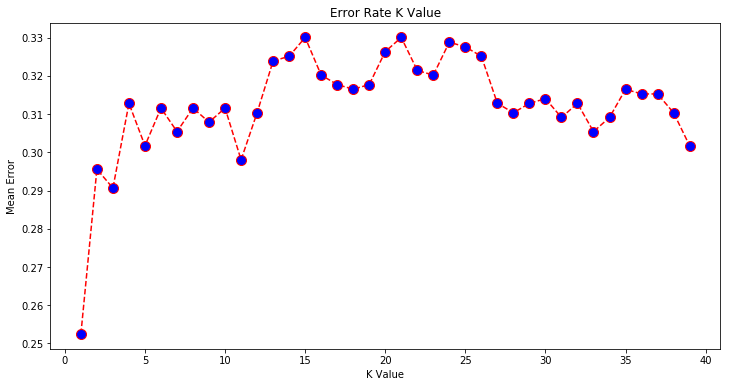

In [15]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), scores, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error') 